<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# ENTORNO DE PROGRAMACION

En este notebook vemos como podemos instalar las librerias de qiskit en un entorno distinto de IBM Quantum.

In [4]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install pylatexenc
!pip install qiskit-ibmq-provider

Looking in indexes: https://nexus.roqs.basf.net/repository/python/simple

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://nexus.roqs.basf.net/repository/python/simple

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://nexus.roqs.basf.net/repository/python/simple

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://nexus.roqs.basf.net/repository/python/simple

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
import dotenv
dotenv.load_dotenv()

True

In [6]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.46.0', 'qiskit-aer': '0.13.3', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [7]:
import os

from qiskit import IBMQ, Aer

IBMQ.save_account(os.environ['IBMQ_TOKEN'], overwrite=True) 

In [8]:
#list available backends - entornos de ejecucion disponibles para tu cuenta
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
#imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi

%matplotlib inline

In [10]:
#BUILD A CIRCUIT AND MEASUREMENT
qreg = QuantumRegister(3) # a 3-qubit register
creg = ClassicalRegister(3) # a 3-bit classical register
qc = QuantumCircuit(qreg,creg) # create a circuit

qreg_q=QuantumRegister(3,'q')
creg_c=ClassicalRegister(3,'c')
qc= QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.cx(qreg_q[0],qreg_q[1])
qc.cx(qreg_q[1],qreg_q[2])

qc.measure(qreg_q,creg_c)

result_counts ->  {'000': 243, '111': 269}


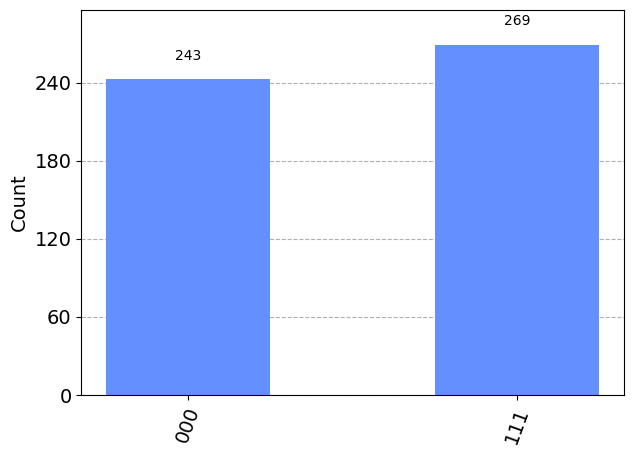

In [11]:
# COMPILIMG AND RUNNING -SIMMULATOR
backend=provider.get_backend('ibmq_qasm_simulator')
transpiled_qc = qiskit.transpile(qc, backend)
job = backend.run(transpiled_qc, shots=512)
result=job.result()
result_counts=result.get_counts()
print('result_counts -> ',result_counts)
plot_histogram(result_counts)# COMPILIMG AND RUNNING -SIMMULATOR

Al ejecutar en una QPU real tu trabajo se encola y puede tardar mucho en ejecutarse. 

Pdemos ir al Dashboard > Jobs de tu cuenta y ver el tiempo estimado de ejecucion en la cola

In [12]:
# COMPILIMG AND RUNNING - IBMQ QPU
backend=provider.get_backend('ibm_brisbane')
job=execute(qc,backend,shots=512) # shots default = 1024
result=job.result()
result_counts=result.get_counts()
print('result_counts -> ',result_counts)
plot_histogram(result_counts)

/tmp/ipykernel_5145/1519879865.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(qc,backend,shots=512) # shots default = 1024


IBMQBackendApiError: "Error submitting job: '400 Client Error: Bad Request for url: https://api.quantum.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/65d694906ba1ce4ce89b6552/jobDataUploaded. Error in runtime client calling method runJob: Error executing POST https://runtime-us-east.quantum-computing.ibm.com/jobs {No request body}, Error code: 2413.'"